# 2.4.3 [Explanatory Power: Assumptions of Linear Regression](https://courses.thinkful.com/data-201v1/project/2.4.3)

In [1]:
import math
import warnings

from IPython.display import display
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
import statsmodels.formula.api as smf

# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)

In [2]:
# Acquire, load, and preview the data.
data = pd.read_csv('https://tf-curricula-prod.s3.amazonaws.com/data-science/Advertising.csv')
display(data.head())

# Instantiate and fit our model.
regr = linear_model.LinearRegression()
Y = data['Sales'].values.reshape(-1, 1)
X = data[['TV','Radio','Newspaper']]
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.100,37.800,69.200,22.100
1,2,44.500,39.300,45.100,10.400
2,3,17.200,45.900,69.300,9.300
3,4,151.500,41.300,58.500,18.500
4,5,180.800,10.800,58.400,12.900



Coefficients: 
 [[ 0.04576465  0.18853002 -0.00103749]]

Intercept: 
 [2.93888937]

R-squared:
0.8972106381789521


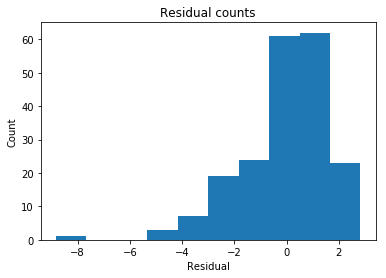

In [3]:
# Extract predicted values.
predicted = regr.predict(X).ravel()
actual = data['Sales']

# Calculate the error, also called the residual.
residual = actual - predicted

# This looks a bit concerning.
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

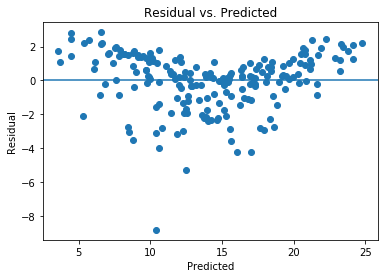

In [4]:
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

# Hm... looks a bit concerning.

## Resolve Heteroscedasticity

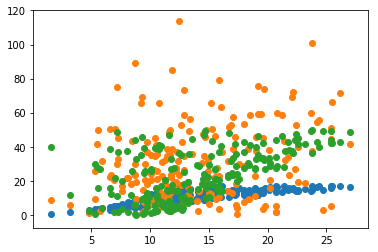

In [12]:
plt.scatter(data.Sales, np.sqrt(data.TV))
plt.scatter(data.Sales, data.Newspaper)
plt.scatter(data.Sales, data.Radio)

In [13]:
data['tv_sqrt'] = np.sqrt(data['TV'])

## Resolve Multivariate Non-Normality

(array([0.00610515, 0.0122103 , 0.03052575, 0.0244206 , 0.04884121,
        0.04273606, 0.03663091, 0.03052575, 0.03663091, 0.09157726,
        0.05494636, 0.06105151, 0.06105151, 0.07936696, 0.06105151,
        0.09157726, 0.13431332, 0.15262877, 0.07326181, 0.09157726]),
 array([ 0.83666003,  1.65564059,  2.47462116,  3.29360173,  4.1125823 ,
         4.93156286,  5.75054343,  6.569524  ,  7.38850457,  8.20748513,
         9.0264657 ,  9.84544627, 10.66442683, 11.4834074 , 12.30238797,
        13.12136854, 13.9403491 , 14.75932967, 15.57831024, 16.39729081,
        17.21627137]),
 <a list of 20 Patch objects>)

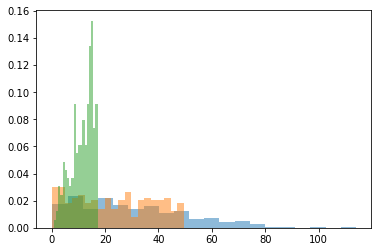

In [21]:

plt.hist(data.Newspaper, bins=20, alpha=.5,density=True)

plt.hist(data.Radio, bins=20, alpha=.5, density=True)
plt.hist(data.tv_sqrt, bins=20, alpha=.5, density=True)